
*   Import Pandas for ETL
*   SQLite for SQL DB.




In [128]:
import pandas as pd
import seaborn as sns
import sqlite3

In [80]:
# creating a connector to sqliteDB
conn = sqlite3.connect("la_sales.sqlite")

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
sales_df1 = pd.read_csv("/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-04.csv")

In [12]:
sales_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          29 non-null     object 
 1   store_name        29 non-null     object 
 2   product_category  29 non-null     object 
 3   date              29 non-null     object 
 4   Unit sales        28 non-null     float64
 5   DOLLAR SALES      29 non-null     float64
 6   store_zip         29 non-null     object 
 7   promotion_flag    27 non-null     object 
dtypes: float64(2), object(6)
memory usage: 1.9+ KB


In [107]:
import glob
file_path = glob.glob("/content/drive/My Drive/LA_Retail_Sales/*.csv")
file_path

['/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-02.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-27.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-22.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-03.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-04.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-25.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-26.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-29.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-28.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-23.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-30.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-06.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-08.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-10.csv',
 '/content/drive/My Drive/LA_Retail_Sales/sales_2024-12-01.csv',
 '/content/drive/My Drive

In [109]:
sales_df = pd.concat([pd.read_csv(fp) for fp in file_path], ignore_index=True)

READING DATA FROM AN API.

In [130]:
import requests
import time
from datetime import datetime

# X_RapidAPI_Key = "587fb824aamsh64a7b48a7d9f7a8p1b0f16jsn1e5edb46f321"

# url = "https://wft-geo-db.p.rapidapi.com/v1/geo/countries"

# headers = {
#     "X-RapidAPI-Key": "587fb824aamsh64a7b48a7d9f7a8p1b0f16jsn1e5edb46f321",
#     "X-RapidAPI-Host": "wft-geo-db.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers)

# # Debug: Check what's actually returned
# print(f"Status Code: {response.status_code}")
# print(f"Response Text: {response.json()}")

# data = response.json()

In [131]:
# for country in data["data"]:
#   name = country["name"]
#   currency = country["currencyCodes"]
#   print(f"name: {name} currency code {currency}")

In [132]:
# Weather API data
api_key = "b3e038185c693020931697956115e***" # subscription needed for weather data.
# Latitude and longitude coordination for LA
LAT, LON = 34.05222, -118.2437
unix_timestamp = int(datetime.strptime(str(sales_df["date"][0].date()), "%Y-%m-%d").timestamp())

url = (
    f"https://api.openweathermap.org/data/3.0/onecall/timemachine"
    f"?lat={LAT}&lon={LON}&dt{unix_timestamp}&appid={api_key}&units=imperial"
)

response = requests.get(url)

response

<Response [401]>

TRANSFORMING DATA USING PANDAS

In [110]:
# sales data summary
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          2398 non-null   object 
 1   store_name        2398 non-null   object 
 2   product_category  2398 non-null   object 
 3   date              2398 non-null   object 
 4   Unit sales        2259 non-null   float64
 5   DOLLAR SALES      2398 non-null   float64
 6   store_zip         2398 non-null   object 
 7   promotion_flag    2291 non-null   object 
dtypes: float64(2), object(6)
memory usage: 150.0+ KB


In [111]:
# handling space between column names
sales_df.columns = sales_df.columns.str.lower().str.replace(" ", "_")
sales_df

,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag
0,LA004,Store_4,Personal Care,12/2/24,36.0,482.52,90027,False
1,LA008,Store_8,Household,12/2/24,47.0,181.40,90019,True
2,LA004,Store_4,Snacks,12/2/24,38.0,879.18,90011,True
3,LA005,Store_5,Produce,12/2/24,46.0,485.38,90002,True
4,LA008,Store_8,beverages,12/2/24,31.0,436.06,90002,False
...,...,...,...,...,...,...,...,...
2393,LA004,Store_4,Snacks,1/27/24,26.0,59.53,90014,True
2394,LA004,Store_4,Personal Care,5/27/24,29.0,774.79,90015,True
2395,LA003,Store_3,produce,3/17/24,35.0,188.31,90011,False
2396,LA006,Store_6,Snacks,7/23/24,30.0,381.04,90001,True


In [95]:
# #  Miss values in sales_df
# missing_unit_sales_rows = sales_df.query("unit_sales.isna()")
# print("Before changes to nan in unit sales")
# missing_unit_sales_rows

In [96]:
# print("After filling nan with zeros in unit sales")
# sales_df['unit_sales'] = sales_df['unit_sales'].fillna(0)
# sales_df.info()

In [112]:
# Total number of missing values in sales data
print("Before Dropping nan's in the sales dataframe")
print(f"columns  count with missing values: {sales_df.isna().sum()}\n")

Before Dropping nan's in the sales dataframe


,0
store_id,0
store_name,0
product_category,0
date,0
unit_sales,139
dollar_sales,0
store_zip,0
promotion_flag,107


In [116]:
# Droping nan in unit sales and promotion_flag
sales_df = sales_df.dropna(subset=["unit_sales", "promotion_flag"])
print("After dropping nan's from the data frame")
print(f"{sales_df.isna().sum()}\n")
print(sales_df.info())

After dropping nan's from the data frame
store_id            0
store_name          0
product_category    0
date                0
unit_sales          0
dollar_sales        0
store_zip           0
promotion_flag      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 2162 entries, 0 to 2397
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          2162 non-null   object 
 1   store_name        2162 non-null   object 
 2   product_category  2162 non-null   object 
 3   date              2162 non-null   object 
 4   unit_sales        2162 non-null   float64
 5   dollar_sales      2162 non-null   float64
 6   store_zip         2162 non-null   object 
 7   promotion_flag    2162 non-null   object 
dtypes: float64(2), object(6)
memory usage: 152.0+ KB
None


In [137]:
# Type casting/ converting to the correct datatypes
sales_df['date'] = pd.to_datetime(sales_df['date'], format='mixed')
sales_df['unit_sales'] = sales_df['unit_sales'].astype(int)
sales_df['promotion_flag'] = sales_df['promotion_flag'].astype(bool)
sales_df['dollar_sales'] = sales_df['dollar_sales'].round(2)
sales_df["revenue_per_unit"] = (sales_df['dollar_sales'] / sales_df['unit_sales']).round(2)


In [138]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2162 entries, 0 to 2397
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   store_id          2162 non-null   object        
 1   store_name        2162 non-null   object        
 2   product_category  2162 non-null   object        
 3   date              2162 non-null   datetime64[ns]
 4   unit_sales        2162 non-null   int64         
 5   dollar_sales      2162 non-null   float64       
 6   store_zip         2162 non-null   object        
 7   promotion_flag    2162 non-null   bool          
 8   revenue_per_unit  2162 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 218.7+ KB


In [139]:
# Before implementations
print("Before validating store zipcode")
sales_df['store_zip'].value_counts()

Before validating store zipcode


,count
store_zip,
90000,230
90025,91
90016,79
90011,77
90004,75
90001,73
90021,73
90028,70
90027,70


In [140]:
# Implementing changes to store zip
sales_df['store_zip'] = sales_df['store_zip'].str.replace("XX", "00")

In [141]:
#  Sales statistics
sales_df.describe()

,date,unit_sales,dollar_sales,revenue_per_unit
count,2162,2162.000000,2162.000000,2162.000000
mean,2024-10-02 04:47:04.051803648,26.197965,446.328053,38.195772
min,2024-01-01 00:00:00,1.000000,10.170000,0.260000
25%,2024-07-23 06:00:00,14.000000,224.242500,8.792500
50%,2024-12-06 00:00:00,27.000000,438.370000,16.830000
75%,2024-12-18 00:00:00,39.000000,666.340000,32.060000
max,2024-12-31 00:00:00,50.000000,898.610000,892.740000
std,NaN,14.376752,255.700532,82.599412


In [142]:
sales_df.head()

,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag,revenue_per_unit
0,LA004,Store_4,Personal Care,2024-12-02,36,482.52,90027,False,13.40
1,LA008,Store_8,Household,2024-12-02,47,181.40,90019,True,3.86
2,LA004,Store_4,Snacks,2024-12-02,38,879.18,90011,True,23.14
3,LA005,Store_5,Produce,2024-12-02,46,485.38,90002,True,10.55
4,LA008,Store_8,beverages,2024-12-02,31,436.06,90002,False,14.07


<Axes: xlabel='dollar_sales', ylabel='Count'>

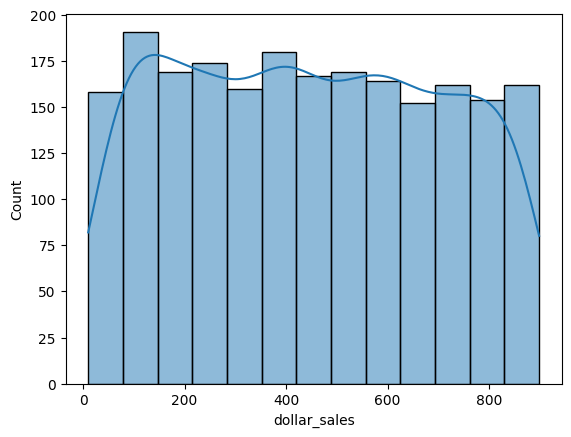

In [143]:
sns.histplot(data=sales_df,x="dollar_sales", kde=True)

LOADING AND READING DATA FROM SQL DATABASE


In [144]:
# LOADIND DATA TO SQL example

# define db name as sales_database.db
conn = sqlite3.connect("sales_database.db")

# Load sales dataframe to sqlite3
sales_df.to_sql("sales", conn, if_exists="replace", index=False)

2162

In [145]:
# validating data load
total_sales_record = pd.read_sql("SELECT COUNT(*) AS total_sales_record FROM sales", conn)
total_sales_record

,total_sales_record
0,2162


In [146]:
# second validation, get first five rows
sales_sample_record = pd.read_sql("SELECT * FROM sales LIMIT 5", conn)
sales_sample_record

,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag,revenue_per_unit
0,LA004,Store_4,Personal Care,2024-12-02 00:00:00,36,482.52,90027,0,13.40
1,LA008,Store_8,Household,2024-12-02 00:00:00,47,181.40,90019,1,3.86
2,LA004,Store_4,Snacks,2024-12-02 00:00:00,38,879.18,90011,1,23.14
3,LA005,Store_5,Produce,2024-12-02 00:00:00,46,485.38,90002,1,10.55
4,LA008,Store_8,beverages,2024-12-02 00:00:00,31,436.06,90002,0,14.07
